<a href="https://colab.research.google.com/github/devanoabe/PCVK_GANJIL_23-24/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan : 20


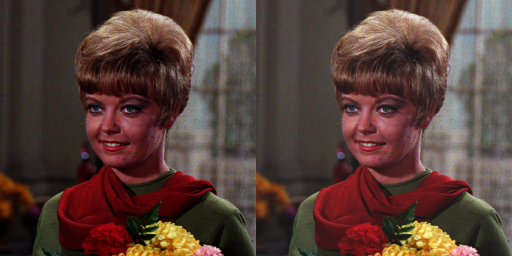

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

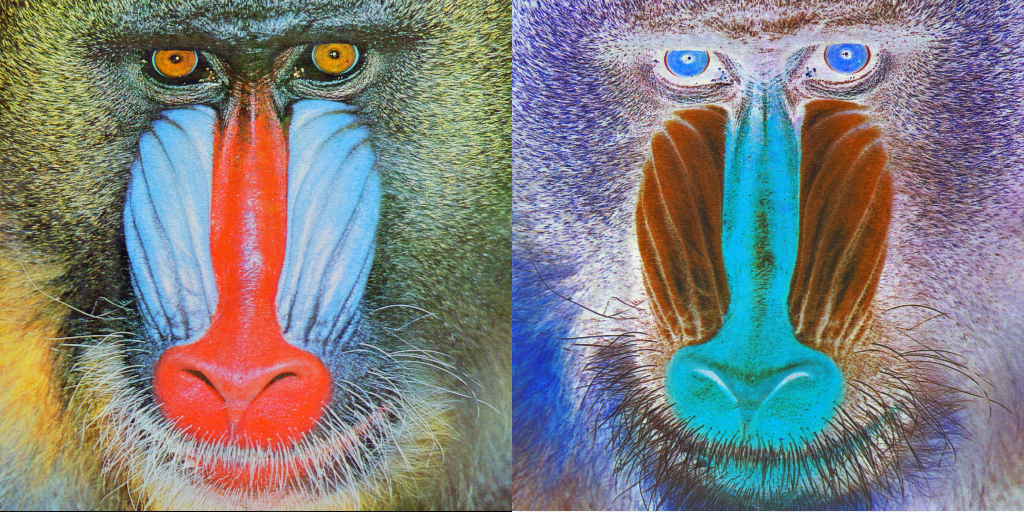

In [5]:
catInv = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/mandrill.tiff')
height, width, channels = catInv.shape
inverted_cat1 = np.copy(catInv)

for i in range(channels):
    inverted_cat1[:, :, i] = 255 - inverted_cat1[:, :, i]

frame1 = cv.hconcat((catInv, inverted_cat1))
cv2_imshow(frame1)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


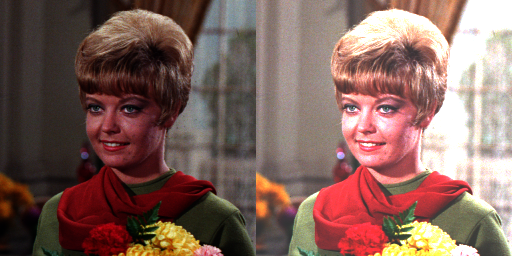

In [6]:
print(' Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------------')

#input kecerahan dan kontras
brght = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
ctr = float(input("Masukkan nilai kontras [1.0 - 3.0]: "))

# mengubah kecerahana dan kontras berdasarkan inputan
catCon = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/female.tiff')
adjusted_cat2 = cv.convertScaleAbs(catCon, alpha=ctr, beta=brght)

frame2 = cv.hconcat((catCon, adjusted_cat2))
cv2_imshow(frame2)


* Operasi contrast dapat dilakukan dengan memodifikasi formula yang digunakan pada linier brightness, yaitu:

* 𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + 𝑏 , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


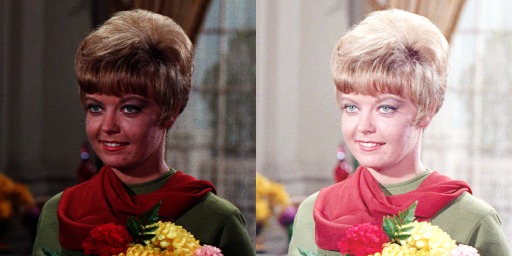

In [7]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  bvalue = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

catCer = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/female.tiff')
brightness_image = np.zeros(catCer.shape, catCer.dtype)

for y in range(catCer.shape[0]):
  for x in range(catCer.shape[1]):
    for c in range(catCer.shape[2]):
      brightness_image[y,x,c] = np.clip(bvalue*  (np.log(1 + catCer[y,x,c])), 0 , 255)

final_frame = cv.hconcat((catCer, brightness_image))
cv2_imshow(final_frame)

Secara umum bentuk dari transfomasi log adalah:

* 𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)

dimana

* c : konstanta

* r : nilai grey-level citra input

* s : nilai grey-level citra outpu

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

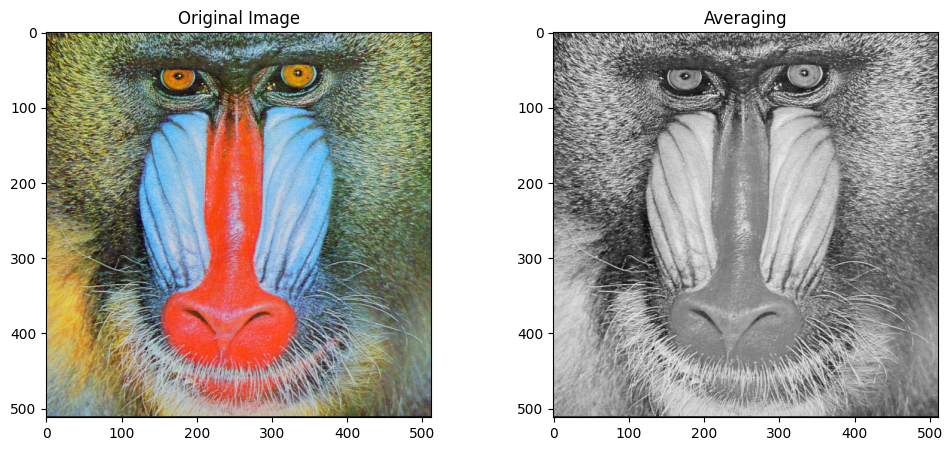

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

catGa = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/mandrill.tiff')
grayscale_cat4a = cv.cvtColor(catGa, cv.COLOR_BGR2GRAY)
fig, (original, gray_cat4a) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(catGa, cv.COLOR_BGR2RGB))
original.set_title('Original Image')

gray_cat4a.imshow(grayscale_cat4a, cmap='gray')
gray_cat4a.set_title('Averaging')

plt.show()

b. Lightness

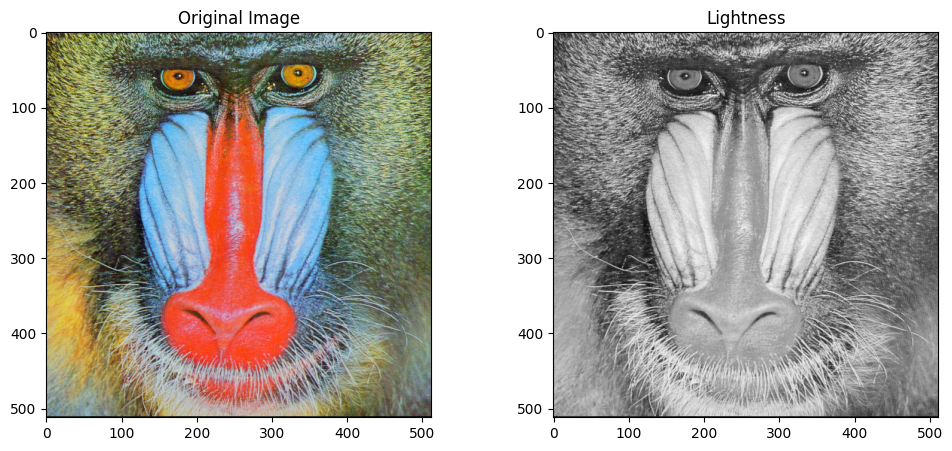

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

catGb = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/mandrill.tiff')
hls_cat = cv.cvtColor(catGb, cv.COLOR_BGR2HLS)
l_channel = hls_cat[:, :, 1]
fig, (original, ltcat) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(catGb, cv.COLOR_BGR2RGB))
original.set_title('Original Image')

ltcat.imshow(l_channel, cmap='gray')
ltcat.set_title('Lightness')

plt.show()

c. Luminance

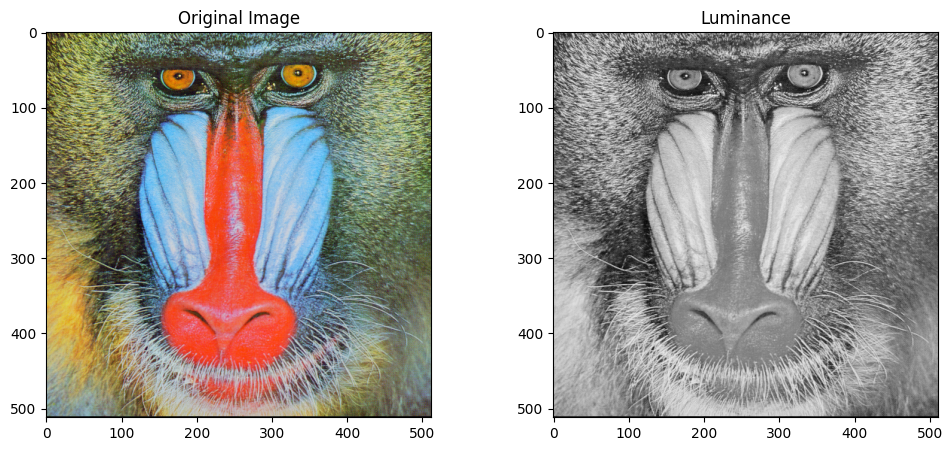

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

catGc = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/mandrill.tiff')
yuv_cat = cv.cvtColor(catGc, cv.COLOR_BGR2YUV)
y_channel = yuv_cat[:, :, 0]
fig, (original, lmcat) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(catGc, cv.COLOR_BGR2RGB))
original.set_title('Original Image')

lmcat.imshow(y_channel, cmap='gray')
lmcat.set_title('Luminance')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

* Saya menampilkan hanya warna biru muda

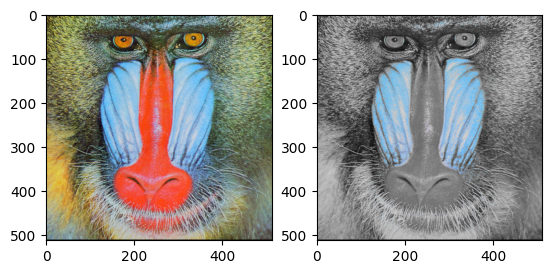

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bro = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/mandrill.tiff')
bro_rgb = cv.cvtColor(bro, cv.COLOR_BGR2RGB)

lower_light_blue = np.array([100, 150, 200], dtype=np.uint8)
upper_light_blue = np.array([200, 200, 255], dtype=np.uint8)
mask_light_blue = cv.inRange(bro_rgb, lower_light_blue, upper_light_blue)

# invers mask biru muda (biru muda menjadi putih, latar belakang menjadi hitam)
mask_light_blue_inv = cv.bitwise_not(mask_light_blue)

# mengubah background menjadi gray
gray = cv.cvtColor(bro, cv.COLOR_BGR2GRAY)
bro = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# menggabungkan gambar biru muda dan background
out = cv.bitwise_and(bro_rgb, bro_rgb, mask=mask_light_blue)
out_bg = cv.bitwise_and(bro, bro, mask=mask_light_blue_inv)
result = cv.add(out, out_bg)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(bro_rgb)
ax[1].imshow(result)
plt.show()